In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
fast = pd.read_csv("../results_remote/FAST_KNN_NO_ObjIndex_deg_param.csv")
# fast = pd.read_csv("../results_05_10/FAST_KNN_NO_ObjIndex_degratio_params.csv")

res = pd.concat([
    fast.loc[:, ['creation_time', 'search_time', 'num_queries', 'name', 'knn_deg_ratio']],
])

name_map = {
    "FAST_KNN_NO_ObjIndex_deg_param": "FAST",
    "CkQST_KNN_NO": "CkQST (Baseline)",
}
res['name'] = res['name'].apply(lambda x: name_map[x])
# res_base['name'] = res_base['name'].apply(lambda x: name_map[x])
# res = res.sort_values(by=['name'])
# res = res[~(res['num_queries'] == 100000)]
res

,creation_time,search_time,num_queries,name,knn_deg_ratio
0,46260463680,1864540110,100000,FAST,5
1,43884868844,1801765562,100000,FAST,10
2,43926229375,2291231114,100000,FAST,25
3,43944787408,2860705815,100000,FAST,50
4,43941643388,3257290870,100000,FAST,75
5,43255137025,3317206995,100000,FAST,100
6,324903843774,4102598679,500000,FAST,5
7,240417849039,4433345487,500000,FAST,10
8,240446935125,5923647188,500000,FAST,25
9,238825869477,8021058269,500000,FAST,50


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

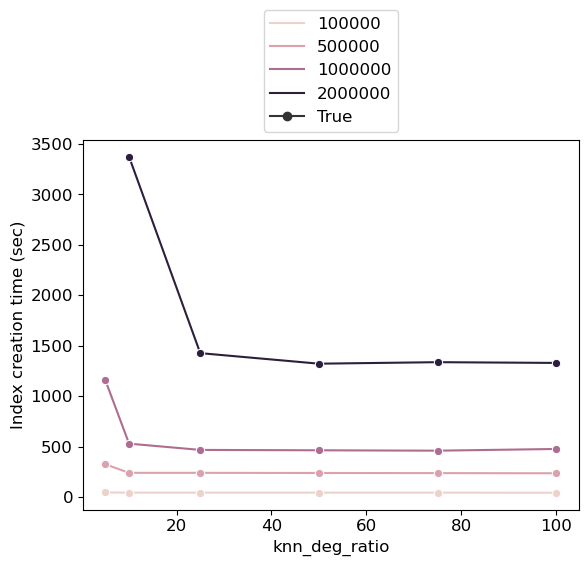

In [4]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'knn_deg_ratio']]
# search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
# search_res = search_res.rename(columns={"num_queries": "No. of queries"})

ax = sns.lineplot(x="knn_deg_ratio", y='Index creation time (sec)', hue='num_queries', style=True, data=search_res, errorbar='sd',
             markers=True)
# plt.axhline(y = ckqst['creation_time'].mean() / 1000000000, color = 'r', linestyle = '-') 
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

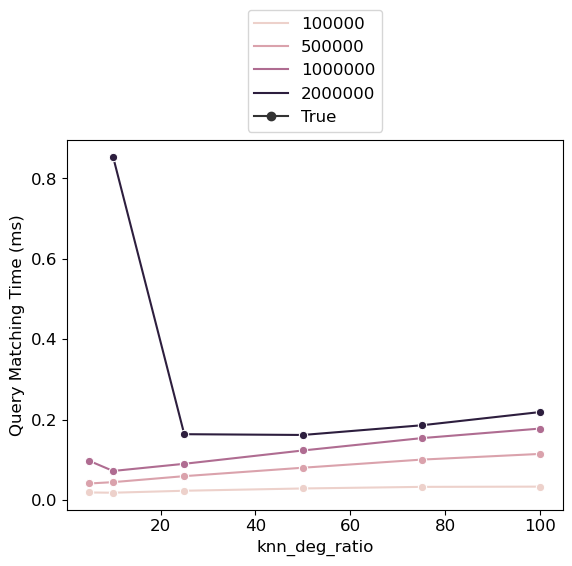

In [9]:
search_res = res.loc[:, ['search_time', 'num_queries', 'knn_deg_ratio']]
search_res['Query Matching Time (ms)'] = search_res['search_time'].apply(lambda x: x) / (
            100000 * 1000000)
# search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

ax = sns.lineplot(x="knn_deg_ratio", y='Query Matching Time (ms)', hue='num_queries', style=True, data=search_res, errorbar='sd', markers=True)
# plt.axhline(y = ckqst['search_time'].mean() / (100000 * 1000000), color = 'r', linestyle = '-') 
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))
# plt.ylim(0, 0.2)

In [6]:
# Optimization
# - Custom iterator
# - Circle bound calculation